<a href="https://colab.research.google.com/github/ozakbas/Computer-Vision-Experiments/blob/main/Comic_Book_Style.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

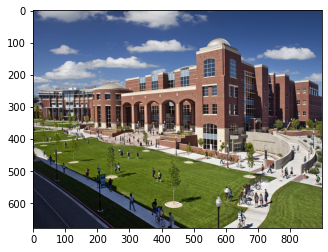

In [ ]:
import requests 
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

url = "https://www.unr.edu/main/images/news/2020/July/knowledge-center_student-union.jpg"

img = Image.open(requests.get(url, stream=True).raw)

image = np.asarray(img)

plt.imshow(img)

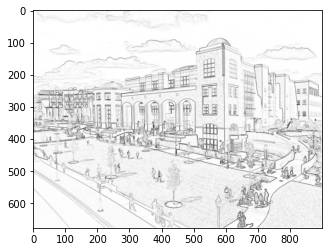

In [ ]:
from skimage import filters, data, segmentation, color
from skimage.future import graph
from skimage.color import rgb2gray


gray_image = rgb2gray(image)
edge_sobel = filters.sobel(gray_image)


plt.imshow(edge_sobel, cmap="gray_r")

edge_sobel = (edge_sobel * 255).astype(np.uint8)
edge = Image.fromarray(edge_sobel)
edge = edge.convert("RGB")

im_invert = ImageOps.invert(edge)

im_invert.save("edges.png", "PNG")

In [ ]:
img = Image.open('edges.png')
img = img.convert("RGBA")
datas = img.getdata()

newData = []

for item in datas:
    if item[0] >= 240 and item[1] >= 240 and item[2] >= 240:
      newData.append((255, 255, 255, 0))
    else:
      newData.append((0,0,0,255))

img.putdata(newData)
img.save("edges_inverted.png", "PNG")

In [ ]:
from skimage.segmentation import felzenszwalb

segments_fz = felzenszwalb(image, scale=50, sigma=1, min_size=20)

# Recolor the regions

image_felzenszwalb_colored = color.label2rgb(segments_fz, image, kind='avg')

bg = (image_felzenszwalb_colored).astype(np.uint8)
bg = Image.fromarray(bg)

bg.save("bg_colors2.png", "PNG")

In [ ]:
edges_inv = Image.open("edges_inverted.png")
bg.paste(edges_inv, (0,0),edges_inv)
bg.show()
bg.save('out.png', "PNG")

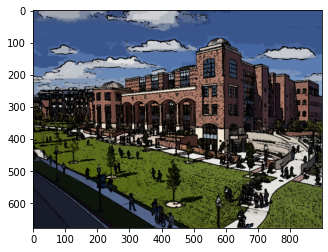

In [ ]:
from PIL import ImageEnhance

im1 = bg.filter(ImageFilter.GaussianBlur(radius=0.5) )

plt.imshow(im1)
im1.save("blurred.png", "PNG")